In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv

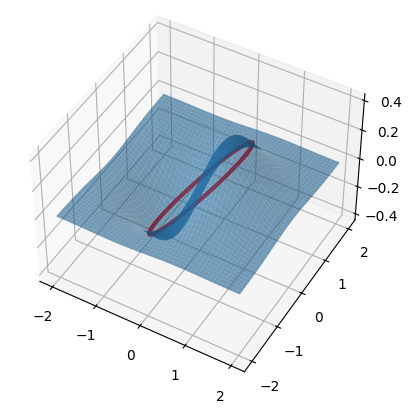

In [ ]:
x=np.linspace(-2,2,50)
y=np.linspace(-2,2,50)
r=1
def myfunc(x,y):
    return x*np.exp(-1*(x**2+y**2))
x,y=np.meshgrid(x,y)
fig=plt.figure()
ax=fig.add_subplot(projection="3d")
ax.plot_surface(x,y,myfunc(x,y),alpha=0.6)
thet=np.linspace(0,2*np.pi,100)
cx=r*np.cos(thet)
cy=r*np.sin(thet)


ax.plot(cx,cy ,myfunc(cx,cy) , 'r', linewidth=3)
ax.view_init(elev=45)
plt.show()

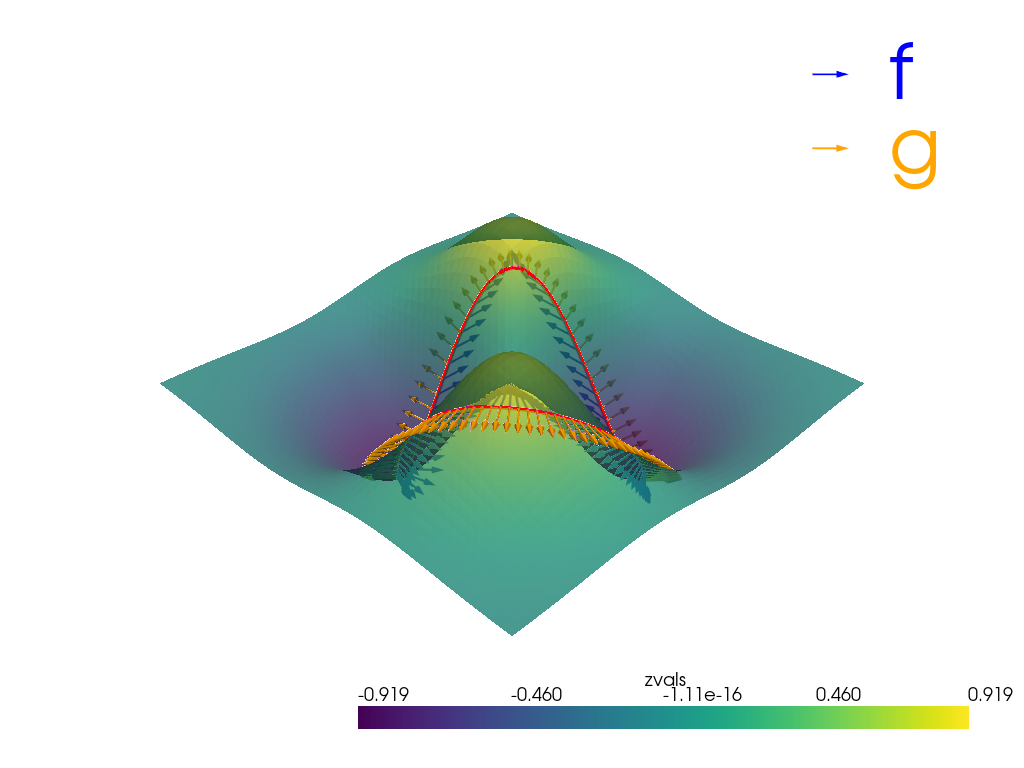

In [4]:
pv.set_jupyter_backend("static")

def f(x, y):
    return 5*x*y*np.exp(-(x**2 + y**2))

def grad_f(x, y):
    exp = np.exp(-(x**2 + y**2))
    dfdx = 5*y*exp*(1 - 2*x**2)
    dfdy = 5*x*exp*(1 - 2*y**2)
    return np.column_stack((dfdx, dfdy, np.zeros_like(x)))

def grad_g(x, y):
    dgdx = 2*(x - 0.2)
    dgdy = 2*(y - 0.3)
    return np.column_stack((dgdx, dgdy, np.zeros_like(x)))

x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
grid = pv.StructuredGrid(X, Y, Z)
grid["zvals"] = Z.ravel(order="F")

theta = np.linspace(0, 2*np.pi, 100)
cx = np.cos(theta) + 0.2
cy = np.sin(theta) + 0.3
cz = f(cx, cy)
curve_pts = np.column_stack((cx, cy, cz))
curve = pv.lines_from_points(curve_pts)
gf = grad_f(cx, cy)
gg = grad_g(cx, cy)
gf /= np.linalg.norm(gf, axis=1)[:, None]
gg /= np.linalg.norm(gg, axis=1)[:, None]
curve_poly = pv.PolyData(curve_pts)
curve_poly["grad_f"] = gf
curve_poly["grad_g"] = gg
pv.Arrow(
    tip_length=0.2,
    tip_radius=0.03,
    shaft_radius=0.01
)

arrows_f = curve_poly.glyph(
    orient="grad_f",
    scale=False,
    factor=0.3
)
arrows_g = curve_poly.glyph(
    orient="grad_g",
    scale=False,
    factor=0.3
)
plotter = pv.Plotter()
plotter.add_mesh(grid, scalars="zvals", cmap="viridis", opacity=0.8)
plotter.add_mesh(curve, color="red", line_width=4,opacity=1)
plotter.add_mesh(arrows_f, color="blue", label="∇f")
plotter.add_mesh(arrows_g, color="orange", label="∇g")
plotter.add_legend()
plotter.view_isometric()
plotter.show()
